<a href="https://colab.research.google.com/github/gelsonschneider/testes-colab-data-science/blob/main/Regress%C3%A3oLogistica_fraudes_em_seguro_Residencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fraudes em Seguro Residencial
Autor: Gelson André Schneider <br>
Método: Regressão Logistica <br>
Data: 15/06/2022

##Importação das bibliotecas utilizadas

In [16]:
import pandas as pd
import matplotlib  as plot
import pandas_profiling

##Carregando Dataset

In [33]:
data = pd.read_excel('/content/Seguro_Residencial.xlsx')

#Analise preliminar do DataSet

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   4415 non-null   int64         
 1   Data                 4415 non-null   datetime64[ns]
 2   Tipo                 4415 non-null   int64         
 3   Inabitavel           4415 non-null   int64         
 4   Valor_reclamado      4415 non-null   float64       
 5   Fraudulento          4415 non-null   int64         
 6   Data_Apolice         4415 non-null   datetime64[ns]
 7   Cobertura            4415 non-null   int64         
 8   Valor_dedutivel      4415 non-null   int64         
 9   Tamanho_cidade       4415 non-null   int64         
 10  Sexo                 4415 non-null   int64         
 11  Nascimento           4415 non-null   datetime64[ns]
 12  Formação             4415 non-null   int64         
 13  Inicio_trabalho      4415 non-nul

In [35]:
data.head()

,Id,Data,Tipo,Inabitavel,Valor_reclamado,Fraudulento,Data_Apolice,Cobertura,Valor_dedutivel,Tamanho_cidade,Sexo,Nascimento,Formação,Inicio_trabalho,Aposentado,Renda,Estado_Civil,Data_Ocupacao,residencia_primaria
0,351069569,2008-01-18 10:09:59,3,0,192.287,0,1987-01-26 00:26:43,436,2000,1,1,1943-03-12,2,1981-04-16,0,193,0,1978-01-06,1
1,806984053,2008-07-18 23:21:30,3,0,355.896,0,1983-05-14 16:02:51,925,1000,2,0,1933-05-10,2,1982-11-04,0,203,0,1971-02-04,1
2,654100160,2008-03-01 00:42:16,5,0,3.530,0,1988-01-15 11:53:21,79,1000,1,1,1939-04-02,2,2004-08-20,0,49,0,1977-03-30,1
3,653220231,2008-10-28 10:00:09,1,0,33.452,0,2000-02-22 19:19:45,607,1000,1,0,1972-04-12,3,1999-07-29,0,118,1,1993-05-23,1
4,226637568,2008-05-31 03:55:07,5,0,4.029,0,2001-08-09 22:37:46,119,3000,5,1,1968-08-04,1,2004-07-04,0,18,0,2000-09-04,1


In [8]:
data.columns.values

array(['Id', 'Data', 'Tipo', 'Inabitavel', 'Valor_reclamado',
       'Fraudulento', 'Data_Apolice', 'Cobertura', 'Valor_dedutivel',
       'Tamanho_cidade', 'Sexo', 'Nascimento', 'Formação',
       'Inicio_trabalho', 'Aposentado', 'Renda', 'Estado_Civil',
       'Data_Ocupacao', 'residencia_primaria'], dtype=object)

#Análise da Estatistica Descritiva das principais colunas

5    1291
1    1054
3    1039
2     627
4     404
Name: Tipo, dtype: int64

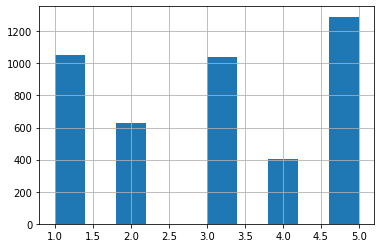

In [9]:
data['Tipo'].hist()
data['Tipo'].value_counts()

1    1133
2    1048
3     887
4     810
5     537
Name: Tamanho_cidade, dtype: int64

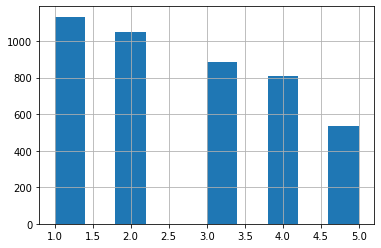

In [10]:
data['Tamanho_cidade'].hist()
data['Tamanho_cidade'].value_counts()

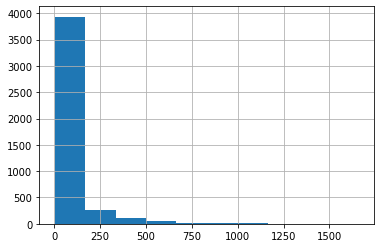

In [11]:
data['Valor_reclamado'].hist()

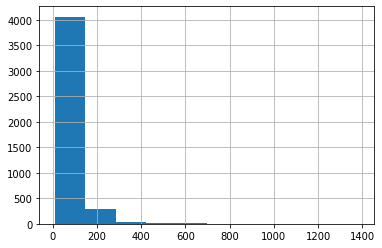

In [12]:
data['Renda'].hist()

0    3952
1     463
Name: Fraudulento, dtype: int64

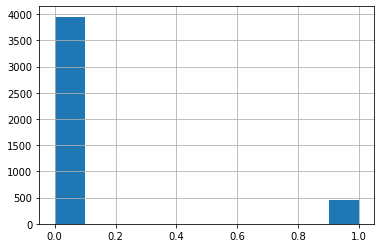

In [13]:
data['Fraudulento'].hist()
data['Fraudulento'].value_counts()

#Removendo colunas sem interesse para o modelo


In [36]:
data = data.drop(columns=['Id'])

In [37]:
data.head()

,Data,Tipo,Inabitavel,Valor_reclamado,Fraudulento,Data_Apolice,Cobertura,Valor_dedutivel,Tamanho_cidade,Sexo,Nascimento,Formação,Inicio_trabalho,Aposentado,Renda,Estado_Civil,Data_Ocupacao,residencia_primaria
0,2008-01-18 10:09:59,3,0,192.287,0,1987-01-26 00:26:43,436,2000,1,1,1943-03-12,2,1981-04-16,0,193,0,1978-01-06,1
1,2008-07-18 23:21:30,3,0,355.896,0,1983-05-14 16:02:51,925,1000,2,0,1933-05-10,2,1982-11-04,0,203,0,1971-02-04,1
2,2008-03-01 00:42:16,5,0,3.530,0,1988-01-15 11:53:21,79,1000,1,1,1939-04-02,2,2004-08-20,0,49,0,1977-03-30,1
3,2008-10-28 10:00:09,1,0,33.452,0,2000-02-22 19:19:45,607,1000,1,0,1972-04-12,3,1999-07-29,0,118,1,1993-05-23,1
4,2008-05-31 03:55:07,5,0,4.029,0,2001-08-09 22:37:46,119,3000,5,1,1968-08-04,1,2004-07-04,0,18,0,2000-09-04,1


#Colunas categóricas que deverão ser transformadas para colunas dunny (Tipo, Tamanho_cidade, Formação, Inabitável, Aposentado, Residencia Primária) <br>



In [41]:
data = pd.get_dummies(data, columns=['Tipo', 'Tamanho_cidade', 'Formação', 'Inabitavel', 'Aposentado', 'Estado_Civil', 'residencia_primaria'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data                   4415 non-null   datetime64[ns]
 1   Valor_reclamado        4415 non-null   float64       
 2   Fraudulento            4415 non-null   int64         
 3   Data_Apolice           4415 non-null   datetime64[ns]
 4   Cobertura              4415 non-null   int64         
 5   Valor_dedutivel        4415 non-null   int64         
 6   Sexo                   4415 non-null   int64         
 7   Nascimento             4415 non-null   datetime64[ns]
 8   Inicio_trabalho        4415 non-null   datetime64[ns]
 9   Renda                  4415 non-null   int64         
 10  Data_Ocupacao          4415 non-null   datetime64[ns]
 11  Tipo_1                 4415 non-null   uint8         
 12  Tipo_2                 4415 non-null   uint8         
 13  Tip

#Começando a trabalhar com o modelo